In [71]:
from taxii2client.v20 import Server, Collection
from pymongo import MongoClient
import datetime
from stix2 import parse
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.pyplot import figure
from pyvis.network import Network
import plotly.graph_objs as go
from plotly.offline import plot
import nbformat
import requests
from requests.auth import HTTPBasicAuth
import json
from bson import ObjectId
import geopandas as gpd
from collections import defaultdict
from dateutil.parser import parse
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd
import stix2

In [12]:
mongo_client = MongoClient('localhost', 27017)
db1 = mongo_client.stix_database
collection1 = db1.stix_data
G1 = nx.Graph()

# db2 = mongo_client.stix_database
# collection2 = db2.stix_data
# G2 = nx.Graph()


In [3]:
server_url1 = 'https://cti-taxii.mitre.org/taxii/'

server1 = Server(server_url1)

api_root1 = server1.api_roots[0]

collection_id_enterprise = '95ecc380-afe9-11e4-9b6c-751b66dd541e'
taxii_collection1 = Collection(f"{api_root1.url}collections/{collection_id_enterprise}/")

collection_id_pre = '062767bd-02d2-4b72-84ba-56caef0f8658'
taxii_collection2 = Collection(f"{api_root1.url}collections/{collection_id_pre}/")

collection_id_mobile = '2f669986-b40b-4423-b720-4396ca6a462b'
taxii_collection3 = Collection(f"{api_root1.url}collections/{collection_id_mobile}/")

collection_id_ics = '02c3ef24-9cd4-48f3-a99f-b74ce24f1d34'
taxii_collection4 = Collection(f"{api_root1.url}collections/{collection_id_ics}/")

all_taxii_collections = [taxii_collection1, taxii_collection2, taxii_collection3, taxii_collection4]

In [27]:
# username = "niclas.schaefer@unibw.de"
# password = "TestTaxii123456789!"
# api_root = "reports"
# api_key = 'd28de5f218854d09b2fda49cb63ce366'
# collection_id_reports = 'ca8bf6bb-4063-3588-887d-1c3e16c634d8'
# collection_id_playbooks = '5ac266d8-de48-3d6b-83f1-c4e4047d6e44'
# headers = {
#     'X-Api-Key': api_key,
#     'Accept': 'application/vnd.oasis.taxii+json; version=2.0',
#     'Content-Type': 'application/vnd.oasis.taxii+json; version=2.0',
# }

# server_url2 = "https://stix2.unit42.org/"
# api_root2 = server_url2 + "reports/"

# collection_url = api_root2 + f"collections/{collection_id_reports}/objects/"

# response = requests.get(collection_url, auth=HTTPBasicAuth(username, password), headers=headers)
# response.raise_for_status()

# stix_data = response.json()

# result = collection2.insert_many(stix_data["objects"])

# # print(f'Eingefügte Dokument-IDs: {result}')

# def json_serialize(data):
#     if isinstance(data, ObjectId):
#         return str(data)
#     elif isinstance(data, list):
#         return [json_serialize(item) for item in data]
#     elif isinstance(data, dict):
#         return {json_serialize(key): json_serialize(value) for key, value in data.items()}
#     else:
#         return data

# def analyze_and_display_stix_data(stix_data):
#     if 'objects' not in stix_data:
#         print("Keine STIX-Objekte gefunden.")
#         return

#     for obj in stix_data['objects']:
#         print(json.dumps(json_serialize(obj), indent=4))

# analyze_and_display_stix_data(stix_data)

{
    "created": "2020-02-05T14:17:46.686Z",
    "created_by_ref": "identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5",
    "description": "Adversaries may perform software packing or virtual machine software protection to conceal their code. Software packing is a method of compressing or encrypting an executable. Packing an executable changes the file signature in an attempt to avoid signature-based detection. Most decompression techniques decompress the executable code in memory. Virtual machine software protection translates an executable's original code into a special format that only a special virtual machine can run. A virtual machine is then called to run this code.(Citation: ESET FinFisher Jan 2018) \n\nUtilities used to perform software packing are called packers. Example packers are MPRESS and UPX. A more comprehensive list of known packers is available, (Citation: Wikipedia Exe Compression) but adversaries may create their own packing techniques that do not leave the same artif

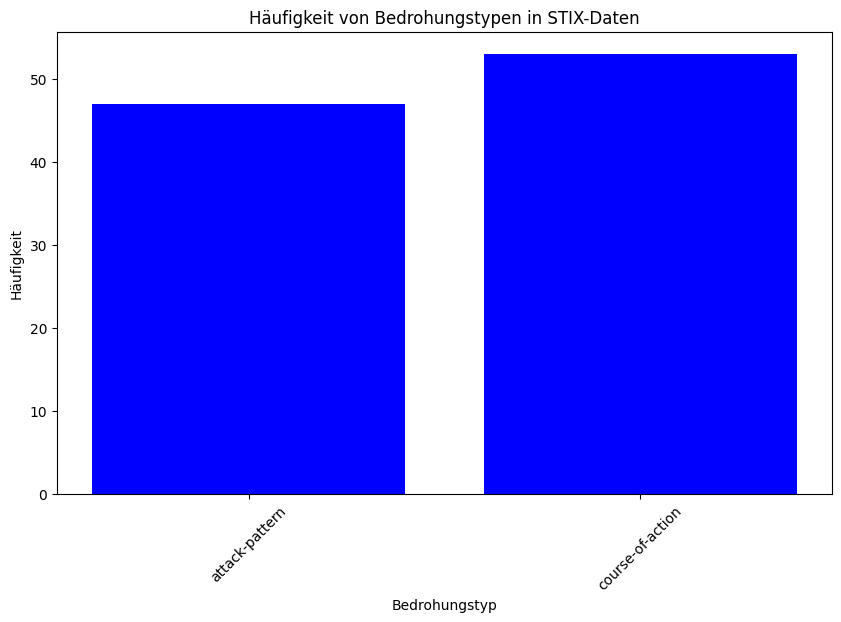

In [28]:
# def prepare_data_for_visualization(stix_data):
#     type_count = {}
#     for obj in stix_data.get('objects', []):
#         obj_type = obj.get('type', 'unbekannt')
#         type_count[obj_type] = type_count.get(obj_type, 0) + 1
#     return type_count

# def visualize_stix_data(stix_data):
#     data = prepare_data_for_visualization(stix_data)

#     plt.figure(figsize=(10, 6))
#     plt.bar(data.keys(), data.values(), color='blue')

#     plt.xlabel('Bedrohungstyp')
#     plt.ylabel('Häufigkeit')
#     plt.title('Häufigkeit von Bedrohungstypen in STIX-Daten')
#     plt.xticks(rotation=45)

#     plt.show()

# visualize_stix_data(stix_data)

In [64]:
for taxii_collection in all_taxii_collections:
    stix_objects = taxii_collection.get_objects()

    if stix_objects.get("objects"):
        for obj in stix_objects["objects"]:
            collection1.update_one({"id": obj["id"]}, {"$set": obj}, upsert=True)

def json_serialize(data):
    if isinstance(data, ObjectId):
        return str(data)
    elif isinstance(data, list):
        return [json_serialize(item) for item in data]
    elif isinstance(data, dict):
        return {json_serialize(key): json_serialize(value) for key, value in data.items()}
    else:
        return data

def analyze_and_display_stix_data(stix_data):
    if 'objects' not in stix_data:
        print("Keine STIX-Objekte gefunden.")
        return

    for obj in stix_data['objects']:
        print(json.dumps(json_serialize(obj), indent=4))

analyze_and_display_stix_data(stix_objects)

{
    "type": "relationship",
    "id": "relationship--cbee31a0-716c-4b10-83f0-aa889bfb4749",
    "created": "2023-10-20T17:05:25.595Z",
    "revoked": false,
    "object_marking_refs": [
        "marking-definition--fa42a846-8d90-4e51-bc29-71d5b4802168"
    ],
    "modified": "2023-10-20T17:05:25.595Z",
    "description": "",
    "relationship_type": "targets",
    "source_ref": "attack-pattern--097924ce-a9a9-4039-8591-e0deedfb8722",
    "target_ref": "x-mitre-asset--986c455b-0f43-42b6-8360-33ac48bd9990",
    "created_by_ref": "identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5",
    "x_mitre_deprecated": false,
    "x_mitre_version": "0.1",
    "x_mitre_attack_spec_version": "3.2.0",
    "x_mitre_modified_by_ref": "identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5"
}
{
    "type": "relationship",
    "id": "relationship--1429cd78-4e2a-4898-a7d8-d01a0c465bd6",
    "created": "2023-10-02T20:24:12.666Z",
    "revoked": false,
    "object_marking_refs": [
        "marking-definition--fa42a846-8

In [6]:
for taxii_collection in all_taxii_collections:    
    stix_objects = taxii_collection.get_objects().get('objects', [])

    for obj in stix_objects:
        if obj['type'] == 'relationship':
            G1.add_edge(obj['source_ref'], obj['target_ref'], label=obj['relationship_type'])
        else:
            G1.add_node(obj['id'], label=obj.get('name', obj.get('type')))


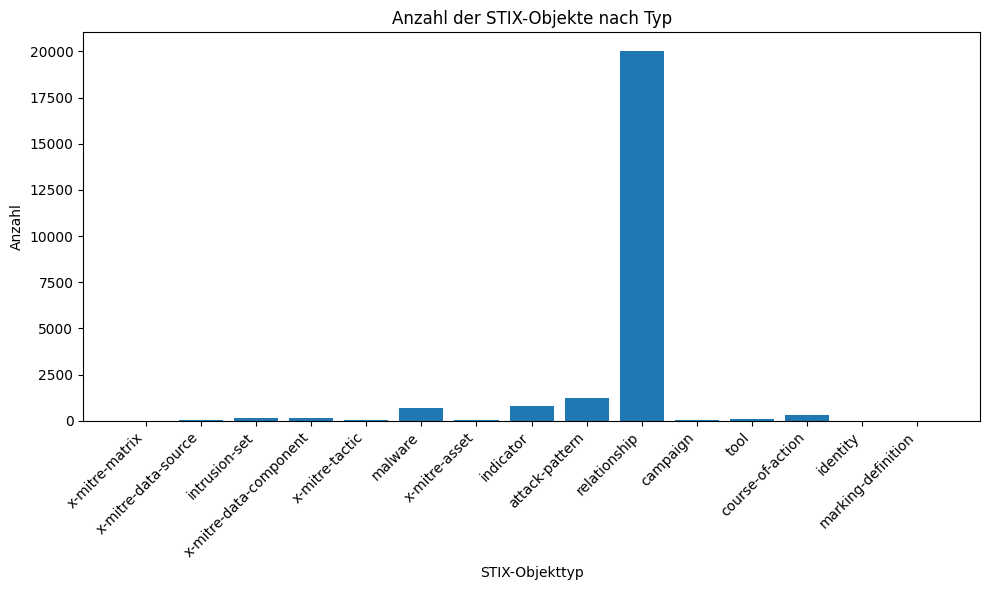

In [7]:
def analyze_types():
    pipeline = [
        {"$group": {"_id": "$type", "count": {"$sum": 1}}}
    ]
    return list(collection1.aggregate(pipeline))
    
def visualize_data(data):
    labels = [elem['_id'] for elem in data]
    counts = [elem['count'] for elem in data]
    
    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts)
    plt.title('Anzahl der STIX-Objekte nach Typ')
    plt.xlabel('STIX-Objekttyp')
    plt.ylabel('Anzahl')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()  
    plt.show()
type_data = analyze_types()
visualize_data(type_data)

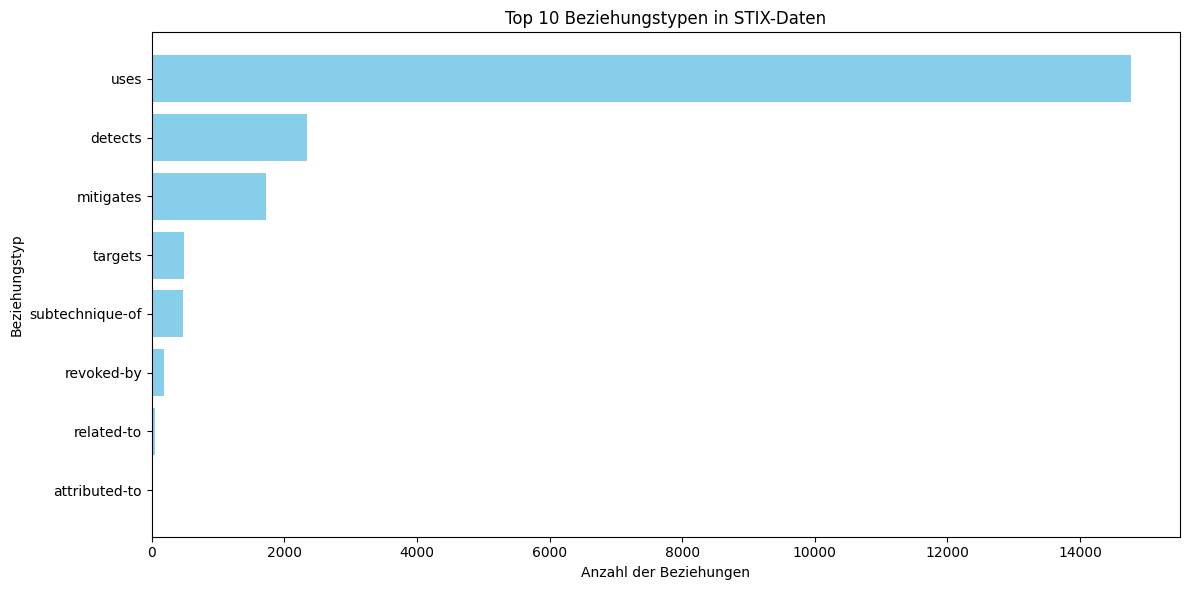

In [8]:
def analyze_relationships():
    pipeline = [
        {"$match": {"type": "relationship"}},
        {"$group": {"_id": "$relationship_type", "count": {"$sum": 1}}},
        {"$sort": {"count": -1}}  
    ]
    return list(collection1.aggregate(pipeline))
def visualize_relationships(data):
    top_relationships = data[:10]  

    labels = [elem['_id'] for elem in top_relationships]
    counts = [elem['count'] for elem in top_relationships]
    
    plt.figure(figsize=(12, 6))
    plt.barh(labels, counts, color='skyblue')  
    plt.title('Top 10 Beziehungstypen in STIX-Daten')
    plt.xlabel('Anzahl der Beziehungen')
    plt.ylabel('Beziehungstyp')
    plt.gca().invert_yaxis()  
    plt.tight_layout()
    plt.show()
relationship_data = analyze_relationships()
visualize_relationships(relationship_data)

In [10]:

pos = nx.spring_layout(G1)

edge_x = []
edge_y = []
for edge in G1.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
text = []
for node in G1.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=text,
    textposition="bottom center",
    marker=dict(
        # showscale=True,
        colorscale='YlGnBu',
        size=10,
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Knowledge Graph mit Plotly',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python-Graphen-Visualisierung",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()

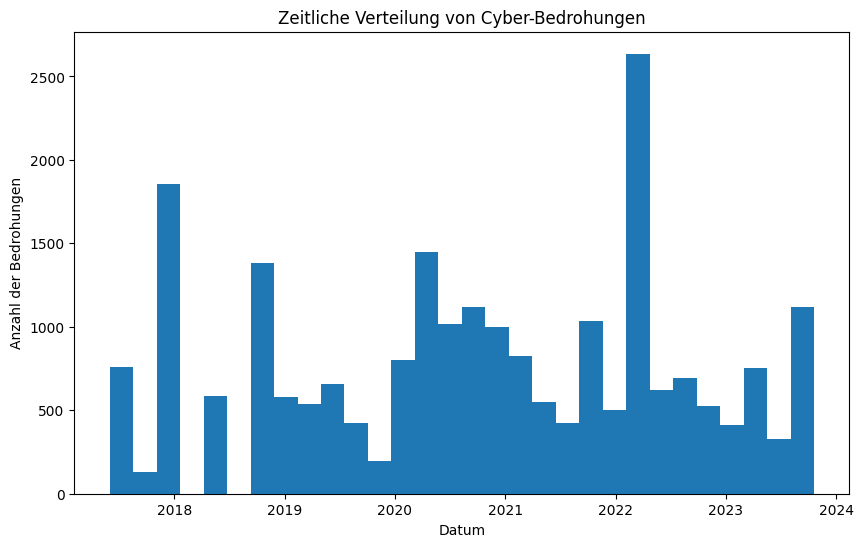

In [41]:
dates = []
for collection in all_taxii_collections:
    stix_objects = collection.get_objects().get('objects', [])
    for obj in stix_objects:
        if 'created' in obj:
            dates.append(pd.to_datetime(obj['created']))

# Zeitliche Verteilung darstellen
plt.figure(figsize=(10, 6))
plt.hist(dates, bins=30)
plt.xlabel('Datum')
plt.ylabel('Anzahl der Bedrohungen')
plt.title('Zeitliche Verteilung von Cyber-Bedrohungen')
plt.show()

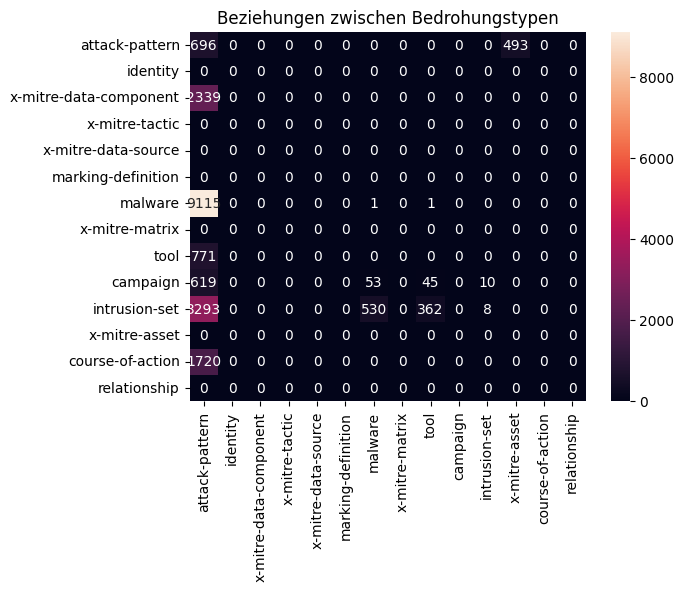

In [47]:
unique_types = set()
for collection in all_taxii_collections:
    stix_objects = collection.get_objects().get('objects', [])
    for obj in stix_objects:
        unique_types.add(obj['type'])

# Konvertierung des Sets in eine Liste
unique_types_list = list(unique_types)

# Initialisierung der Beziehungsmatrix
relationship_matrix = pd.DataFrame(0, index=unique_types_list, columns=unique_types_list)

for collection in all_taxii_collections:
    stix_objects = collection.get_objects().get('objects', [])
    for obj in stix_objects:
        if obj['type'] == 'relationship':
            source_type = next((o['type'] for o in stix_objects if o['id'] == obj['source_ref']), None)
            target_type = next((o['type'] for o in stix_objects if o['id'] == obj['target_ref']), None)
            if source_type and target_type:
                relationship_matrix.at[source_type, target_type] += 1

sns.heatmap(relationship_matrix, annot=True, fmt="d")
plt.title('Beziehungen zwischen Bedrohungstypen')
plt.show()

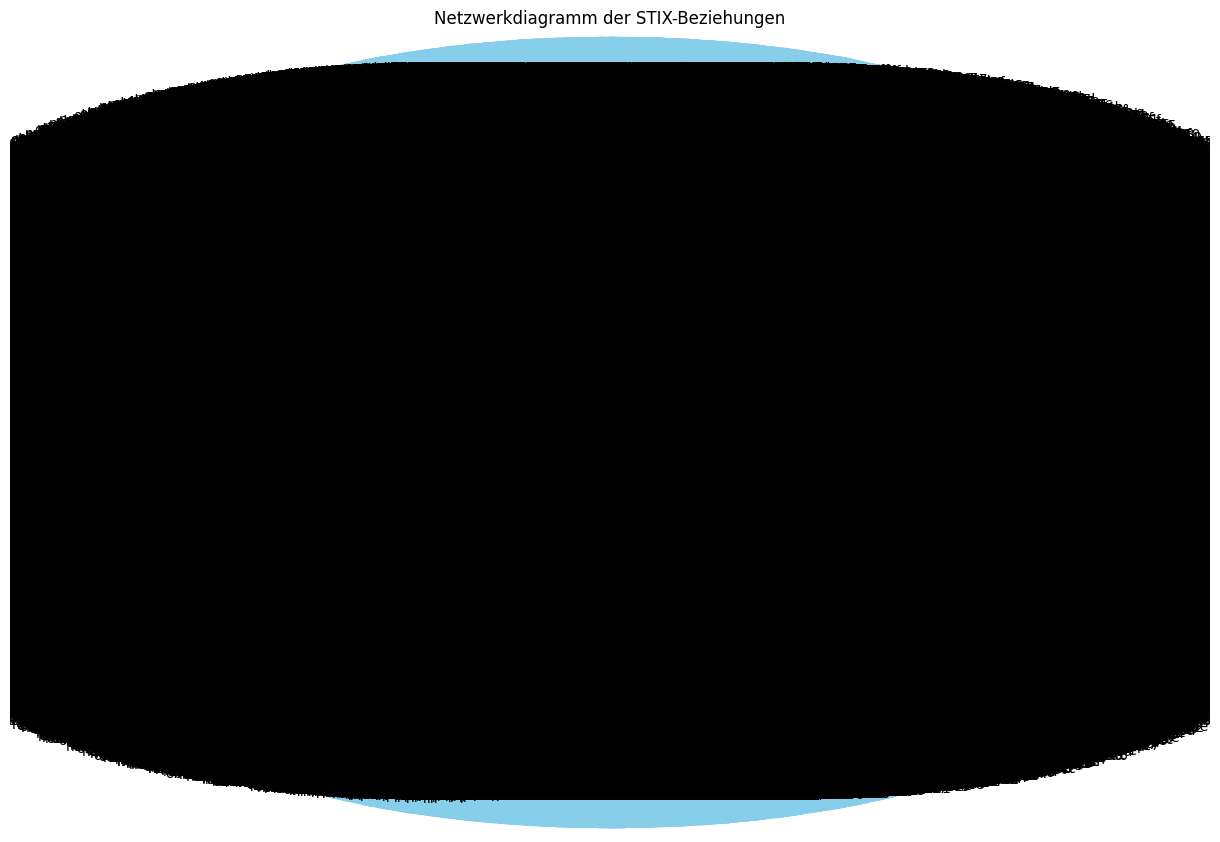

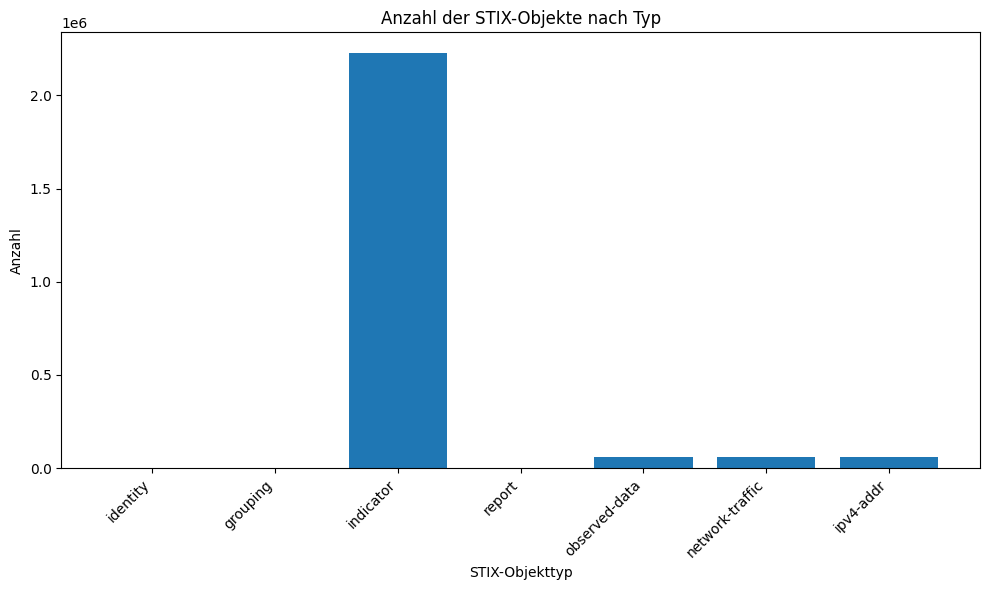

In [75]:
def create_network_diagram(stix_objects):
    G = nx.DiGraph()
    for obj in stix_objects:
        if obj['type'] == 'relationship':
            G.add_edge(obj['source_ref'], obj['target_ref'], label=obj['relationship_type'])
        else:
            G.add_node(obj['id'], label=obj.get('name', obj.get('type')))
    return G

# Funktion zum Anzeigen des Netzwerkdiagramms
def plot_network_diagram(G):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title('Netzwerkdiagramm der STIX-Beziehungen')
    plt.show()

# Funktion zum Analysieren der Objekttypen
def analyze_types(stix_objects):
    type_counts = {}
    for obj in stix_objects:
        obj_type = obj['type']
        if obj_type in type_counts:
            type_counts[obj_type] += 1
        else:
            type_counts[obj_type] = 1
    return type_counts

# Funktion zum Visualisieren der Typen-Daten
def visualize_data(type_data):
    labels = list(type_data.keys())
    counts = list(type_data.values())

    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts)
    plt.title('Anzahl der STIX-Objekte nach Typ')
    plt.xlabel('STIX-Objekttyp')
    plt.ylabel('Anzahl')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

with open('misp.stix2.ADMIN.json') as file:
    data = json.load(file)
    stix_objects = data.get("objects", [])  # Zugriff auf das "objects"-Element

# Überprüfen, ob stix_objects Daten enthält
if not stix_objects:
    print("Keine Daten geladen. Überprüfen Sie den Dateipfad und das Dateiformat.")
else:
    # Erstellen und Anzeigen des Netzwerkdiagramms
    G = create_network_diagram(stix_objects)
    plot_network_diagram(G)

    # Analyse und Visualisierung der Objekttypen
    type_data = analyze_types(stix_objects)
    visualize_data(type_data)